# ${t\bar{t}H\left(b\bar{b}\right)}$ scikit-learn BDT for classification of ${t\bar{t}H}$ and ${t\bar{t}b\bar{b}}$ events

For each signal region, information from the output of the reconstruction BDT is combined with kinematic variables for input to classification BDTs, with ${t\bar{t}H \left(H\to b\bar{b}\right)}$ as signal and ${t\bar{t}}$ as background. There is one BDT trained for events with exactly 5 jets or at least 6 jets.

In [1]:
import datetime
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams["figure.figsize"] = (17, 10)
import pandas as pd
import seaborn as sns
sns.set(context = "paper", font = "monospace")
import sklearn.datasets
from sklearn.preprocessing import MinMaxScaler
import sklearn.tree
import sqlite3
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

# read

In [2]:
df = pd.read_csv("ttHbb_data.csv")

df.head()

,dRbb_avg_Sort4,dRbb_MaxPt_Sort4,dEtajj_MaxdEta,Mbb_MindR_Sort4,Mjj_MindR,nHiggsbb30_Sort4,HT_jets,dRlepbb_MindR_Sort4,Aplanarity_jets,H1_all,TTHReco_best_TTHReco,TTHReco_best_Higgs_mass,TTHReco_best_Higgsbleptop_mass,TTHReco_best_bbHiggs_dR,TTHReco_withH_best_Higgsttbar_dR,TTHReco_best_Higgsleptop_dR,TTHReco_best_b1Higgsbhadtop_dR,LHD_Discriminant,target
0,0.265696,0.325133,0.311509,0.017415,0.023733,0.333333,0.029321,0.335150,0.025005,0.836903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0.412821,0.174657,0.276681,0.051575,0.062728,0.333333,0.151450,0.509171,0.062811,0.548197,0.595407,0.079543,0.162228,0.348091,0.400588,0.441174,0.262685,0.728361,1
2,0.346333,0.386509,0.081872,0.031549,0.025527,0.000000,0.112252,0.224414,0.152014,0.738440,0.663737,0.082487,0.102262,0.640163,0.398795,0.477156,0.555918,0.712721,1
3,0.427364,0.106369,0.369438,0.070832,0.084710,0.500000,0.058080,0.375719,0.111577,0.508818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.384440,0.218341,0.438701,0.054052,0.069121,0.500000,0.167710,0.218126,0.671929,0.169410,0.874208,0.029553,0.058182,0.377938,0.374169,0.397906,0.505010,0.815084,1


# features and targets

In [3]:
features = list(df.columns[:-1])

X = df[features]
y = df["target"]

In [4]:
classifier = sklearn.tree.DecisionTreeClassifier(min_samples_split = 20, random_state = 99, max_depth = 5)
classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best')

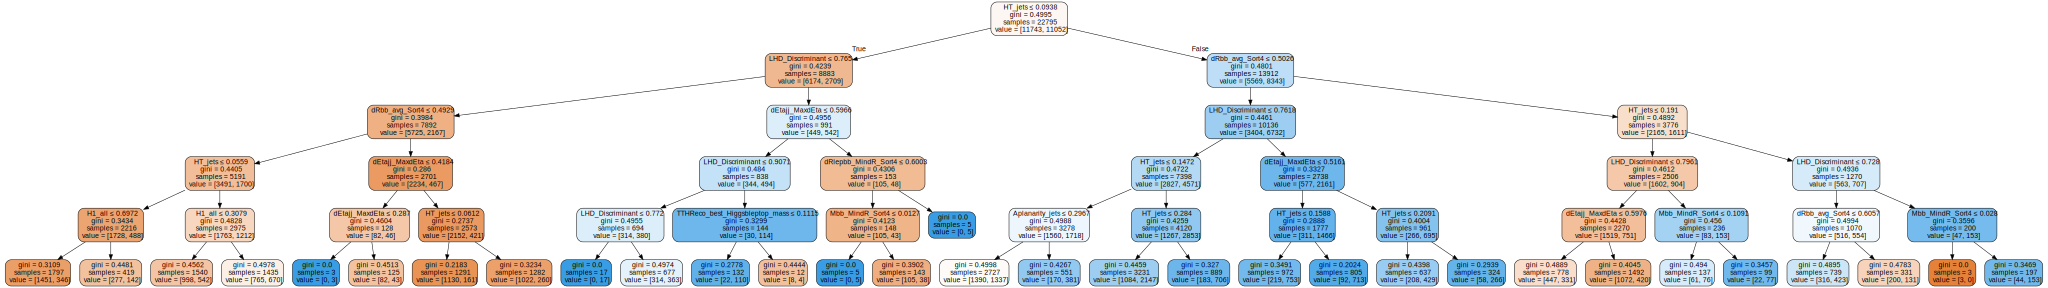

In [5]:
graph = graphviz.Source(
    sklearn.tree.export_graphviz(
        classifier,
        out_file           = None,
        feature_names      = list(df[features].columns.values),
        filled             = True,
        rounded            = True,
        special_characters = True
    )
)
graph

# accuracy

In [6]:
y_predictions = classifier.predict(X)
y_predictions

array([0, 1, 0, ..., 0, 0, 0])

In [7]:
sklearn.metrics.accuracy_score(y, y_predictions)

0.68335161219565699

In [8]:
_df = pd.DataFrame()
_df["variable"]   = X.columns.values
_df["importance"] = classifier.feature_importances_

_df.index = _df["variable"].values
del _df["variable"]

_df = _df.sort_values(by = "importance", ascending = False)
_df

,importance
HT_jets,0.580307
dRbb_avg_Sort4,0.190065
LHD_Discriminant,0.154543
dEtajj_MaxdEta,0.030467
Aplanarity_jets,0.017219
H1_all,0.015864
Mbb_MindR_Sort4,0.006724
TTHReco_best_Higgsbleptop_mass,0.002552
dRlepbb_MindR_Sort4,0.002259
Mjj_MindR,0.000000


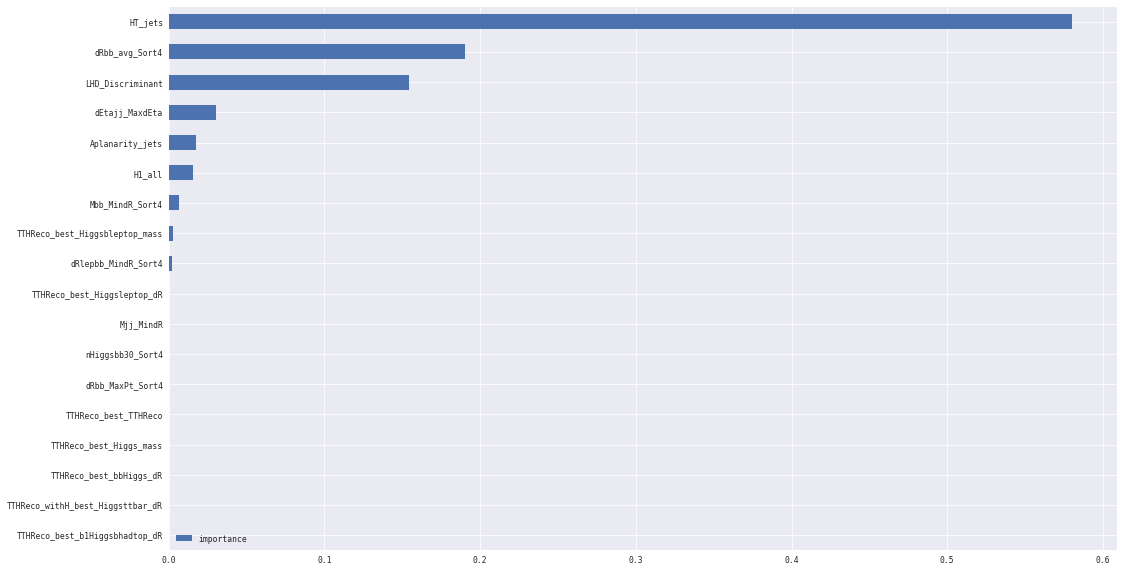

In [9]:
plt.rcParams["figure.figsize"] = (17, 10)

_df.sort_values(by = "importance", ascending = True).plot(kind = "barh", legend = "False");